# PSM

## Introduction


Renderer: None
OpenGL version supported:  None


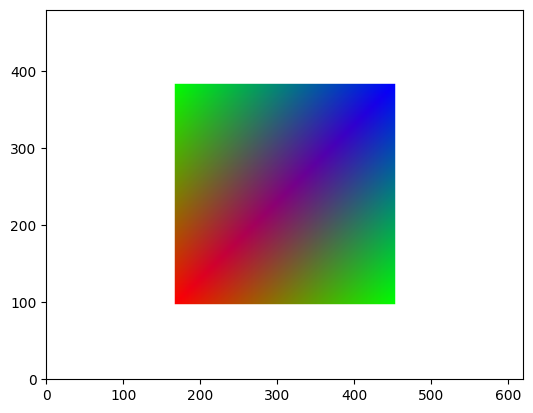

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
import imageio

from OpenGLRender.render import *

height = 480
width = 620

render = OpenGLRender(height, width)
triangle_data = np.array([
        # Positions   Colors    normals
        .5, .5, 0.0,      0, 0, 1, 1,      0, 0, 1.0,
        .5, -.5, 0.0,      0, 1, 0, 1,      0, 0, 1.0,
        -.5, -.5, 0.0,      1, 0, 0, 1,      0, 0, 1.0,
        -.5, -.5, 0.0,      1, 0, 0, 1,      0, 0, 1.0,
        -.5, .5, 0.0,      0, 1, 0, 1,      0, 0, 1.0,
        .5, .5, 0.0,      0, 0, 1, 1,      0, 0, 1.0,
], dtype=np.float32)
render.setTriangleData(triangle_data)
render.setupBuffers()
img = render.draw()

plt.imshow(img)
plt.gca().invert_yaxis()
plt.show()


In [9]:
import parse_obj

out = []
for i in range(10):
        out.append(parse_obj.loadObj('Hi.obj'))

print(out)

[(array([2., 1., 3.]),), (array([2., 1., 3.]),), (array([2., 1., 3.]),), (array([2., 1., 3.]),), (array([2., 1., 3.]),), (array([2., 1., 3.]),), (array([2., 1., 3.]),), (array([2., 1., 3.]),), (array([2., 1., 3.]),), (array([2., 1., 3.]),)]


freeing memory @ 0x55ce26b04bc0
freeing memory @ 0x55ce26f2bab0
freeing memory @ 0x55ce271371a0
freeing memory @ 0x55ce2666d330
freeing memory @ 0x55ce27004840
freeing memory @ 0x55ce265a1ce0
freeing memory @ 0x55ce2716c160
freeing memory @ 0x55ce26634e40
freeing memory @ 0x55ce270f5790
freeing memory @ 0x55ce26634e60


In [5]:
del out

freeing memory @ 0x55ce27004840
freeing memory @ 0x55ce2666d330
freeing memory @ 0x55ce271371a0
freeing memory @ 0x55ce26f2bab0
freeing memory @ 0x55ce26b1a740
freeing memory @ 0x55ce265a1ce0
freeing memory @ 0x55ce27125010
freeing memory @ 0x55ce27124ff0
freeing memory @ 0x55ce270f5790
freeing memory @ 0x55ce27124fd0
